In [155]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ceml.sklearn import generate_counterfactual
from sklearn.linear_model import LogisticRegression

In [25]:
df = pd.read_csv('data_cleaned.csv').drop(['Country', 'Timestamp'], axis=1)
df['Mental_Health_History'] = df['Mental_Health_History'].map({'Yes': True, 'No': False})
df['Mental_Health_History'] = df['Mental_Health_History'].astype(bool)
df.head()

,Female,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,...,Northern_Europe,South_America,Southeastern_Asia,Southern_Africa,Southern_Asia,Southern_Europe,Western_Africa,Western_Asia,Western_Europe,Mental_Health_History
0,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [146]:
df.columns

Index(['Female', 'self_employed', 'family_history', 'treatment',
       'Coping_Struggles', 'Occupation_Business', 'Occupation_Corporate',
       'Occupation_Housewife', 'Occupation_Others', 'Occupation_Student',
       'Days_Indoors_1_14_days', 'Days_Indoors_15_30_days',
       'Days_Indoors_31_60_days', 'Days_Indoors_go_out_every_day',
       'Days_Indoors_more_than_2_months', 'Growing_Stress_Maybe',
       'Growing_Stress_Yes', 'Changes_Habits_Maybe', 'Changes_Habits_Yes',
       'Mood_Swings_High', 'Mood_Swings_Medium', 'Work_Interest_Maybe',
       'Work_Interest_Yes', 'Social_Weakness_Maybe', 'Social_Weakness_Yes',
       'mental_health_interview_Maybe', 'mental_health_interview_Yes',
       'care_options_Not sure', 'care_options_Yes',
       'Australia_and_New_Zealand', 'Central_America', 'Eastern_Europe',
       'Northern_America', 'Northern_Europe', 'South_America',
       'Southeastern_Asia', 'Southern_Africa', 'Southern_Asia',
       'Southern_Europe', 'Western_Africa', 'Wes

In [56]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train_X = df_train.drop(columns=['treatment']).to_numpy() #make variable
df_train_Y = df_train['treatment'].to_numpy() #make variable
df_test_X = df_test.drop(columns=['treatment']).to_numpy() #make variable
df_test_Y = df_test['treatment'].to_numpy() #make variable

In [150]:
#Try logistic regression
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42, max_iter=5000, multi_class='multinomial')
clf.fit(df_train_X, df_train_Y)
print('Accuracy = {}'.format(clf.score(df_test_X, df_test_Y)))

Accuracy = 0.7072240697856633


# Feature importance

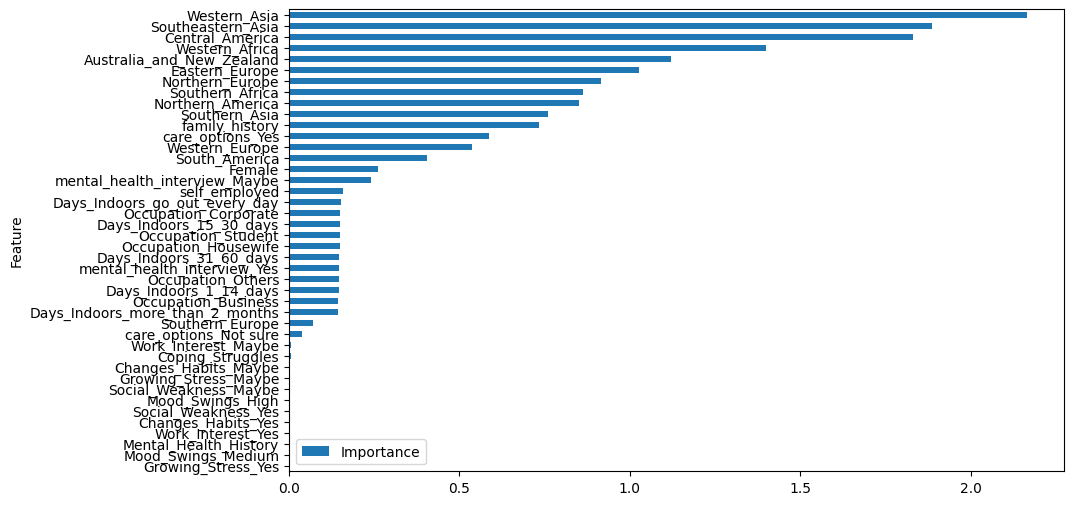

In [153]:
coefficients = clf.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': df_train.drop(columns=['treatment']).columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

# Counterfactuals

In [154]:
#For convenience, I will print the indices of the features here
for i in range(len(df_train.drop(columns=['treatment']).columns)):
    print('Index {}, column {}'.format(i, df_train.drop(columns=['treatment']).columns[i]))

Index 0, column Female
Index 1, column self_employed
Index 2, column family_history
Index 3, column Coping_Struggles
Index 4, column Occupation_Business
Index 5, column Occupation_Corporate
Index 6, column Occupation_Housewife
Index 7, column Occupation_Others
Index 8, column Occupation_Student
Index 9, column Days_Indoors_1_14_days
Index 10, column Days_Indoors_15_30_days
Index 11, column Days_Indoors_31_60_days
Index 12, column Days_Indoors_go_out_every_day
Index 13, column Days_Indoors_more_than_2_months
Index 14, column Growing_Stress_Maybe
Index 15, column Growing_Stress_Yes
Index 16, column Changes_Habits_Maybe
Index 17, column Changes_Habits_Yes
Index 18, column Mood_Swings_High
Index 19, column Mood_Swings_Medium
Index 20, column Work_Interest_Maybe
Index 21, column Work_Interest_Yes
Index 22, column Social_Weakness_Maybe
Index 23, column Social_Weakness_Yes
Index 24, column mental_health_interview_Maybe
Index 25, column mental_health_interview_Yes
Index 26, column care_options

In [131]:
#Try logistic regression

# Train a logistic regression classifier
clf2 = LogisticRegression(random_state=42, max_iter=5000, multi_class='multinomial')
clf2.fit(df_train_X, df_train_Y)
print('Accuracy = {}'.format(clf2.score(df_test_X, df_test_Y)))

Accuracy = 0.7072240697856633


In [161]:
#Generate a list of features that may be changed for the counterfactuals. This avoids unchangable 
#features such as nationality being changed in the counterfactual
#Note, we can also make this an input in our dash app, where the user can specify which featue values may change in the counterfactual

changeable_features = ['self_employed', 'Coping_Struggles', 'Occupation_Business', 'Occupation_Corporate',
                       'Occupation_Housewife', 'Occupation_Others', 'Occupation_Student',
                       'Days_Indoors_1_14_days', 'Days_Indoors_15_30_days',
                       'Days_Indoors_31_60_days', 'Days_Indoors_go_out_every_day',
                       'Days_Indoors_more_than_2_months', 'Growing_Stress_Maybe',
                       'Growing_Stress_Yes', 'Changes_Habits_Maybe', 'Changes_Habits_Yes',
                       'care_options_Not sure', 'care_options_Yes']

feature_dct={}
features_whitelist = []

for i in range(len(df_train.drop(columns=['treatment']).columns)):
    feature_dct[df_train.drop(columns=['treatment']).columns[i]] = i

for i in changeable_features:
    if i in feature_dct:
        features_whitelist.append(feature_dct[i])
print(features_whitelist)

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 26, 27]


In [167]:
instance_to_explain = df_test_X[1]
true_label = df_test_Y[1]

counterfactuals = generate_counterfactual(clf2, instance_to_explain, y_target=False, features_whitelist=features_whitelist)
print(counterfactuals)

{'x_cf': array([-2.12007972e-15, -9.13043072e-13, -5.95479584e-15, -2.74325494e-14,
        8.30298460e-13,  8.58527511e-13,  8.51736169e-13,  1.00000000e+00,
        8.56058719e-13,  8.33877118e-13,  8.56340758e-13,  8.50435692e-13,
        1.00000000e+00,  8.18217251e-13,  1.54811049e-14,  1.15624733e-16,
        1.84752683e-14,  6.00314588e-15,  2.13595238e-17,  1.00000000e+00,
        4.26250883e-17, -6.53333372e-18, -2.17273766e-17,  1.00000000e+00,
        1.93985119e-15, -1.18801408e-15,  2.26275361e-13,  7.48453878e-01,
       -8.58217739e-15,  9.45406566e-15, -8.21393999e-15,  1.00000000e+00,
       -7.42030823e-15, -3.27571191e-15,  9.25657959e-15, -7.00186212e-15,
       -6.17432282e-15, -5.77076973e-16,  9.59412064e-15,  8.11622206e-15,
       -4.35178324e-15,  4.79811728e-18]), 'y_cf': False, 'delta': array([ 2.12007972e-15,  9.13043072e-13,  5.95479584e-15,  2.74325494e-14,
       -8.30298460e-13, -8.58527511e-13, -8.51736169e-13, -8.34221581e-13,
       -8.56058719e-13, 

# Counterfactual example with Iris dataset (purely for practice)

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from ceml.sklearn import generate_counterfactual

# Select an instance to explain
instance_to_explain = X_test[0]
true_label = y_test[0]

# Generate a counterfactual explanation
cf = generate_counterfactual(clf, instance_to_explain, y_target=0)

print(cf)
# print("Counterfactual instance:", cf.xcf)
# print("Counterfactual label:", cf.ycf)
# print("Original instance:", instance_to_explain)
# print("Original label:", true_label)

{'x_cf': array([5.44999005, 2.8       , 2.14998998, 1.2       ]), 'y_cf': 0, 'delta': array([0.65000995, 0.        , 2.55001002, 0.        ])}
